### **Modality:** Collaborative
### **Members and ID:**
###- Mario Ramón Silva Rodríguez - A01795366
###- David Emmanuel Villanueva Martínez - A01638389
###- Divad Alejandro Shriqui - A01366906
###- Jorge Trujillo Peña - A01795379
###- Amiel Joel Rosete Islas - A01748598
###- Óscar Antonio Suárez Valdez - A01323987

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [139]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline
from sklearn.model_selection import train_test_split

# The libraries are defined

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
#Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#The path of the csv documents is assigned
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Adv. Methods ML/Tarea 1b'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [142]:
# Randomly select 10 samples from the 'train_df' DataFrame for inspection
train_df.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22839,23,133,138,142,145,147,149,150,152,156,...,129,102,140,187,187,187,189,189,189,189
2008,15,137,142,150,156,160,164,168,171,175,...,74,65,28,31,55,59,36,32,36,26
1439,2,140,141,141,140,140,142,141,141,142,...,186,186,186,185,184,184,182,181,182,162
16253,20,179,182,186,190,192,194,197,199,200,...,243,242,241,240,240,241,236,236,229,207
8978,7,224,225,227,227,228,228,228,229,228,...,210,238,152,81,119,95,107,75,118,226
3407,17,156,160,164,168,171,172,174,177,179,...,98,199,214,213,213,214,213,213,212,210
15002,9,91,94,96,98,100,103,106,108,108,...,92,80,71,154,177,172,174,174,172,172
15531,9,87,88,60,81,90,32,26,60,68,...,73,57,62,152,172,174,176,177,179,181
13568,14,39,39,44,60,75,86,99,112,118,...,88,87,89,89,98,115,121,96,95,99
2816,10,94,107,113,118,123,128,131,134,139,...,171,174,175,175,176,177,178,175,197,210


### Importar Images

In [143]:
# Get the unique values from the 'label' column of 'train_df' and sort them
array = train_df['label'].unique()
sorted(array)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [144]:
# Convert the 'label' column from the 'train_df' DataFrame into a NumPy array for training labels
y_train = np.array(train_df['label'])

# Convert the 'label' column from the 'valid_df' DataFrame into a NumPy array for validation labels
y_val = np.array(valid_df['label'])

# Remove the 'label' column from 'train_df' since it will only be used for labels, not for input features
del train_df['label']

# Remove the 'label' column from 'valid_df' for the same reason
del valid_df['label']

# Convert the remaining training data (without the 'label' column) into a NumPy array of type float32
x_train = train_df.values.astype(np.float32)

# Convert the remaining validation data (without the 'label' column) into a NumPy array of type float32
x_val = valid_df.values.astype(np.float32)

In [145]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into validation and test sets.
    '''
    # Check that dimensions are equal
    assert len(x) == len(y)

    # Shuffle data if required
    if shuffle:
        idx = np.random.permutation(len(x))
        x = x[idx]
        y = y[idx]

    # Make test/validation partition using the pct parameter
    x_val = x[:int(len(x) * pct)]
    y_val = y[:int(len(y) * pct)]

    x_test = x[int(len(x) * pct):]
    y_test = y[int(len(y) * pct):]

    return x_val, y_val, x_test, y_test
    pass

In [146]:
# Split the validation set (x_val, y_val) into separate validation and test sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [147]:
# Create a list of lowercase letters from the alphabet, removing 'j' and 'z', then print the length of the modified alphabet
alphabet = list(string.ascii_lowercase)  # Generate a list of lowercase letters
alphabet.remove('j')                      # Remove 'j' from the list
alphabet.remove('z')                      # Remove 'z' from the list
print(len(alphabet))                      # Print the length of the modified alphabet

24


### Normalise

In [148]:
def normalise(x_mean, x_std, x_data):
    """
    Normalize the input data using the given mean and standard deviation.
    """
    return (x_data - x_mean) / x_std  # Apply normalization formula

In [149]:
# Calculate the mean of the training data
x_mean = x_train.mean()

# Calculate the standard deviation of the training data
x_std = x_train.std()

# Normalize the training data using the calculated mean and standard deviation
x_train = normalise(x_mean, x_std, x_train)

# Normalize the validation data using the training mean and standard deviation
x_val = normalise(x_mean, x_std, x_val)

# Normalize the test data using the training mean and standard deviation
x_test = normalise(x_mean, x_std, x_test)

### Graficar muestras

In [150]:
def plot_image(image):
    """
    Plot a 28x28 grayscale image.
    """
    plt.figure(figsize=(5, 5))  # Create a new figure with a specified size
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.get_cmap('gray'))  # Reshape the flat image and display it in grayscale
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the plotted image


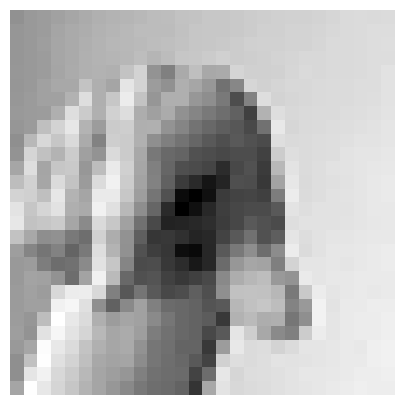

La letra es: q


In [151]:
# Generate a random integer in the y_train domain
idx = np.random.randint(len(y_train))

# Call plot function but reshaping array to be a 28x28 pixel image
plot_image(x_train[idx].reshape(28,28))

# Show image label
print(f'La letra es: {alphabet[y_train[idx]]}')


### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [152]:
def create_minibatches(mb_size, x, y, shuffle=True):
    """Create mini-batches from the x and y datasets.
    """
    assert x.shape[0] == y.shape[0], 'Error: Mismatch in the number of samples'  # Ensure x and y have the same number of samples
    total_data = x.shape[0]  # Get the total number of samples

    if shuffle:
        idxs = np.arange(total_data)  # Create an array of indices
        np.random.shuffle(idxs)  # Shuffle the indices
        x = x[idxs]  # Shuffle the input data
        y = y[idxs]  # Shuffle the labels accordingly

    # Generate mini-batches using a generator expression
    return ((x[i:i + mb_size], y[i:i + mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [153]:
class np_tensor(np.ndarray):
    """
    This class allows for the creation of tensor-like objects using NumPy's ndarray,
    enabling potential enhancements or custom methods specific to tensor operations.
    """
    pass  # Placeholder for future enhancements or custom methods

###  Clase Linear

In [154]:
class Linear:
    def __init__(self, input_size: int, output_size: int) -> None:
        """Fully Connected Layer
        """
        # Initialize weights with a scaled random normal distribution and create a np_tensor
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size / 2)).view(np_tensor)
        # Initialize biases as zeros and create a np_tensor
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        """Forward pass through the layer.
        """
        return self.W @ X + self.b  # Matrix multiplication and addition of bias

    def backward(self, X, Z):
        """Backward pass for computing gradients.
        """
        X.grad = self.W.T @ Z.grad  # Gradient of the input is the product of weights and gradient from output
        self.W.grad = Z.grad @ X.T   # Gradient of the weights is the product of output gradient and input
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)  # Gradient of the biases is the sum of output gradients

### Clase ReLU

In [155]:
class ReLU:
    def __call__(self, Z):
        """Forward pass through the ReLU activation function.
        """
        return np.maximum(0, Z)  # Apply ReLU activation by returning the maximum of 0 and Z

    def backward(self, Z, A):
        """Backward pass for computing gradients through the ReLU activation.
        """
        Z.grad = A.grad.copy()  # Copy the gradient from the next layer
        Z.grad[Z <= 0] = 0  # Set gradients to 0 where the input Z was less than or equal to 0

In [156]:
from typing import Any

class Softmax:
    def __call__(self, z) -> Any:
        """Forward pass through the Softmax activation function.
        """
        exp = np.exp(z)  # Compute the exponentials of the input logits
        sum = np.sum(exp)  # Compute the sum of the exponentials
        return np.divide(exp, sum).copy()  # Normalize by dividing each exponential by the sum to get probabilities

    def backward(self, S):
        """Backward pass for computing gradients through the Softmax activation.
        """
        S_vector = S.reshape(S.shape[0], 1)  # Reshape S to a column vector
        S_matrix = np.tile(S_vector, S.shape[0])  # Create a matrix where each row is the S_vector
        S.grad = np.diag(S) - (S_matrix * np.transpose(S_matrix))  # Compute the Jacobian of the Softmax function

### Clase Sequential

In [157]:
class Sequential:
    def __init__(self, layers=None) -> None:
        """Creates a Neural Network of stacked layers.
        """
        self.layers = layers  # Store the list of layers in the neural network
        self.outputs = {}  # Initialize a dictionary to hold the outputs of each layer

    def __call__(self, x):
        """Forward pass through the network.
        """
        self.outputs['l0'] = x  # Store the input as the output of the first layer
        for i, layer in enumerate(self.layers, 1):  # Loop through each layer
            x = layer(x)  # Pass input through the current layer
            self.outputs['l' + str(i)] = x  # Store the output of the current layer
        return x  # Return the final output

    def backward(self):
        """Backward pass through the network to compute gradients."""
        for i in reversed(range(len(self.layers))):  # Iterate through layers in reverse order
            li = self.outputs['l' + str(i)]  # Get output of the current layer
            li1 = self.outputs['l' + str(i + 1)]  # Get output of the next layer
            self.layers[i].backward(li, li1)  # Call backward method of the current layer

    def update(self, learning_rate=1e-3):
        """Update the weights and biases of the layers using computed gradients.
        """
        for layer in self.layers:  # Loop through each layer
            if isinstance(layer, (ReLU, Softmax)): continue  # Skip activation layers
            layer.W = layer.W - learning_rate * layer.W.grad  # Update weights
            layer.b = layer.b - learning_rate * layer.b.grad  # Update biases

    def predict(self, x):
        """Make predictions based on input data.
        """
        return np.argmax(self.__call__(x))  # Return the index of the class with the highest probability

### Cost Function

In [158]:
def softmaxXEntropy(x, y):
    """Compute the softmax and cross-entropy loss.
    """
    batch_size = x.shape[1]  # Get the size of the batch
    exp_scores = np.exp(x)  # Calculate the exponential of the input scores
    probs = exp_scores / exp_scores.sum(axis=0)  # Calculate probabilities using softmax
    preds = probs.copy()  # Copy probabilities for output

    # Reshape y to ensure the correct shape for indexing
    y = y.reshape(1, -1)

    # Cost calculation: Cross-entropy loss
    y_hat = probs[y, np.arange(batch_size)]  # Get the predicted probabilities for the true classes
    cost = np.sum(-np.log(y_hat)) / batch_size  # Calculate the average cross-entropy loss

    # Gradient calculation for backpropagation
    probs[y, np.arange(batch_size)] -= 1  # Subtract 1 from the predicted probabilities for the true classes
    x.grad = probs.copy()  # Store the gradient of the input scores

    return preds, cost  # Return the predicted probabilities and the computed cost

### Loop de entrenamiento

In [159]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    """Train the neural network model.
    """
    for epoch in range(epochs):  # Loop over the number of epochs
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):  # Iterate over mini-batches
            scores = model(x.T.view(np_tensor))  # Perform a forward pass through the model
            _, cost = softmaxXEntropy(scores, y)  # Compute the softmax probabilities and cross-entropy loss
            model.backward()  # Perform a backward pass to compute gradients
            model.update(learning_rate)  # Update model weights and biases based on gradients

        # Print the current cost and accuracy after each epoch
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

### Create your model and train it

In [160]:
def accuracy(x, y, mb_size):
    """Calculate the accuracy of the model predictions.
    """
    correct = 0  # Initialize the count of correct predictions
    total = 0    # Initialize the total number of predictions

    # Iterate over mini-batches of data
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))  # Perform a forward pass through the model to get predictions
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())  # Count the number of correct predictions
        total += pred.shape[1]  # Increment the total count of predictions

    return correct / total  # Return the accuracy as a fraction of correct predictions to total predictions

In [161]:
# Determine the number of unique classes in the training labels
num_classes = len(np.unique(y_train))

# Create a sequential neural network model with the following layers:
model = Sequential([
    Linear(784, 200),  # First fully connected layer
    ReLU(),            # Activation layer
    Linear(200, 200),  # Second fully connected layer
    ReLU(),            # Activation layer
    Linear(200, num_classes)  # Output layer for class predictions
])

# Set training parameters
mb_size = 512  # Set mini-batch size for training
learning_rate = 2e-4  # Set learning rate for weight updates
epochs = 40  # Set the number of epochs for training


In [162]:
# Start the training process for the model with the specified number of epochs, mini-batch size, and learning rate.
train(model, epochs, mb_size, learning_rate)

cost: 0.6834522787386863, accuracy: 0.6731734523145566
cost: 0.2529986618412802, accuracy: 0.7364751812604573
cost: 0.11755220510199939, accuracy: 0.7548800892359174
cost: 0.05839463218500414, accuracy: 0.7674288901282766
cost: 0.04761927978421011, accuracy: 0.7674288901282766
cost: 0.0331588569033833, accuracy: 0.7699386503067485
cost: 0.02927909006773457, accuracy: 0.7724484104852203
cost: 0.022370589390643018, accuracy: 0.7752370329057445
cost: 0.015428396520774127, accuracy: 0.7732849972113776
cost: 0.015734445775245295, accuracy: 0.7760736196319018
cost: 0.013644539202298547, accuracy: 0.7752370329057445
cost: 0.012192201039721249, accuracy: 0.7783045175683212
cost: 0.010524402361547055, accuracy: 0.779419966536531
cost: 0.010335288607777299, accuracy: 0.7777467930842163
cost: 0.008167906544777627, accuracy: 0.7780256553262688
cost: 0.008152780632528556, accuracy: 0.7783045175683212
cost: 0.0073573749750517285, accuracy: 0.7796988287785834
cost: 0.006244094337255884, accuracy: 0.7

In [163]:
# Show model accuracy
print(f'Accuracy: {accuracy(x_test, y_test, mb_size)}')

Accuracy: 0.7947573898494144


### Test your model on Random data from your test set

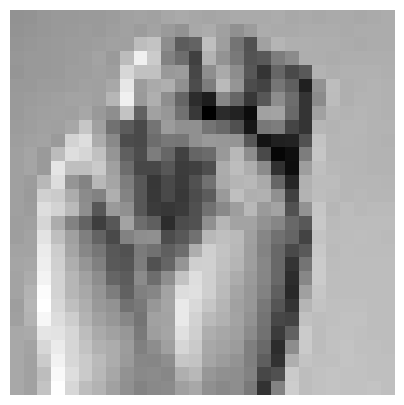

The predicted value is: m and the actual value is: m


In [164]:
# Select a random index from the test set
idx = np.random.randint(len(y_test))

# Plot the selected test image, reshaping it to a 28x28 array for display
plot_image(x_test[idx].reshape(28, 28))

# Use the model to predict the class of the selected test image,
# reshaping the input to match the expected input shape for the model
pred = model.predict(x_test[idx].reshape(-1, 1))

# Print the predicted class and the actual class for the selected test image
print(f'The predicted value is: {alphabet[pred]} and the actual value is: {alphabet[y_test[idx]]}')

## **Justifying the model:**


Working with a classification problem, we based our approach on Fully Connected Deep Neural Networks using low-resolution images (28 x 28 pixels). The process included importing images and handling them through mini-batches, applicable not only in computer vision but also in other Machine Learning and Deep Learning exercises. To achieve results closer to reality, we applied the linear class, ReLU function, sequential class, and cost function.

**Cost Function:**
To optimize the parameters for obtaining the model, we have used the cost function to find the error between the actual value and the estimated value.

**ReLU Function:**
The ReLU function was useful for obtaining our model because it helps reduce the problem of gradient saturation when the values of the linear combination of inputs are greater than 0, allowing for effective backpropagation even when the values of the linear combination of inputs are greater than 0.

**Linear Calculation:**
The simple "linear class" function allows for the calculation of weights and biases for linearly separable problems. Although it is comparable to the perceptron, it demonstrates matrix operations step by step within the Numpy framework.

###**Justification for Hyperparameters:**
**Mini-Batch Size (mb_size = 512):**
Balances efficiency and stable gradient estimation. It provides sufficient data to smooth out noise while being manageable in terms of memory usage.

**Learning Rate (learning_rate = 2e-4):**
A smaller learning rate promotes gradual weight updates, helping prevent overshooting and allowing the model to navigate the loss landscape more effectively.

**Number of Epochs (epochs = 40):**
Provides ample training time to learn from the data while monitoring for overfitting. This number allows for sufficient weight adjustment without excessive training.

##**Conclusion:**

The exercises involved building a neural network model using a sequential architecture with fully connected layers and ReLU activation functions. Key steps included data preprocessing, implementing a mini-batch training approach, and optimizing the model using the softmax cross-entropy loss function. Hyperparameters, such as mini-batch size, learning rate, and the number of epochs, were carefully chosen to balance training efficiency and stability. The model demonstrated its ability to learn and predict effectively through iterative training and evaluation on validation data.

